## Guitar?
I would have prefer to do a project about "bagpipe or not bagpipe" rather than "guitar or not guitar". However, bagpipes are not such a popular instruments as guitars are. Therefore, I had to choose guitars because of the high number of images which are containend on ImageNet, the web used to get the data.

The purpose of this project is to go into what deep learning is and create a Convultional Neural Networks in order to create a model and recognize if this istrument is present (or not) in a picture.

The project is divided in 4 main blocks:

1_Getting the necessary data to go ahaed with the model: This part is ignored in most of the tutorials, but it is one of the most difficult parts of any project. Usually, data scientiest which have just started work in this field, have never faced the problems of getting the data. In real word the data is not clean and there is a lot of work to do before starting to build the model

2_Preparing the data. In this part of the project: The variables are declared as well as image augmentation techniques are used in order to increase the collected data

3_Creating the model:

4_Testing the performance of the model: Cofussion matrix, recal, accuracy, ROC curve...

NOTE: Due the the high computational resources that this Convultional Neural Network requires, I recommend run the code with google coolab, using the GPU.

Contact information:                          
Name: Francisco Álvarez González                                       
E-mail: paquinho89@hotmail.com

Note: After having done a master in Data Science, I am doing some projects to have a bigger portfolio and get some employment opportunities.

In [4]:
#The necessary libraries and packages are imported.
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras import optimizers
from keras import losses
from keras import regularizers
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import image
import matplotlib.pyplot as plt
from IPython.display import Image, display
import requests
import os
from PIL import Image

Using TensorFlow backend.


## 1 Getting the images.
To get the images I used one of the biggest repositories of tagged images as it is ImageNet. For more information about this website visit:
http://www.image-net.org/


In [2]:
!pwd

/content


In [11]:
#This is to let google colab to get access to my google Drive account.

from google.colab import drive
drive.mount('/content/gdrive')

#If I go to the left of the screen, I see that the photos are in the following folder:
#"content/gdrive/MyDrive/bagpipe/photos..."

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Firstly, I copied in a file (url_guitars) all the links where the url images are contained, and then I went over each link getting the images.

In [0]:
url_hawaiian_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03499907'
url_bass_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02804123'
url_acoustic_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02676566'
url_electric_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03272010'
url_classical_guitar = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n03035832'

url_guitar = [url_bass_guitar, url_electric_guitar, url_hawaiian_guitar, url_acoustic_guitar, url_classical_guitar]

for url in url_guitar:
  r = requests.get(url)
  #This is to get the file with the urls which contains the pictures. And another file is created and it is 
  #called photos_urls
  with open('./gdrive/My Drive/guitar_project/url_guitars', 'ab') as f:  
      f.write(r.content)
  f.close()

### In the below code, the images are downloaded from the URL.

In [0]:
#This open the file which contains all the urls of the images
photos_urls_guitar=open('./gdrive/My Drive/guitar_project/url_guitars', mode='r')
n=1
for url in photos_urls_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/img_guitar_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
      pass

In [1]:
#This code is just to see how to name the files
o=1

print('pepe morteo {:06d}'.format(o))

pepe morteo 000001


###Secondly, I created a list with the names of the downloded pictures and I tried to open the images. If it is not possible to open it, the image is deleted from the repository as the link is broken or the image is not contained in the link anymore.

In [0]:
#A list is created with the names of the pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/guitar_photos')
#We go over the list and if the file is not possible to be opened, it is removed as there is an error in the file.
#In this way, we just have the files which have photos and they are correct
for name in list_names:
    try:
        Image.open('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name)
    except:
        os.remove('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name)

In [6]:
#Checking the number of pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/guitar_photos')
len(list_names)

1946

In [0]:
list_names

### The photos are distribuid in 2 folders:
### Guitar_photos // Training
### Guitar_photos // Validation

In [0]:
#The pictures are going to be distribued into 2 folders. One pictures will be for training (85%) ant the rest (15%)
#for validation. Two new folders will be created in the photos folder: 'training_photos' and 'validation_photos'.

training_photos_percentage=round(len(list_names)*0.85)
n=1

for name in list_names:
    if n<training_photos_percentage:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name, './gdrive/My Drive/guitar_project/training_photos/guitar_photos/img_{:06d}.jpg'.format(n))
        n=n+1
    
    else:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/guitar_photos/'+name,'./gdrive/My Drive/guitar_project/validation_photos/guitar_photos/img_{:06d}.jpg'.format(n))
        n=n+1 

## Pictures with NO guitars
Now, we need to repeat the process with images that are no guitars. I am going to get 500 images of each followed class: fish, car, bike, motorbike, cat, city, bgpipe, office, lamp and book.
The process to follow is the same as the one used for getting the guitar pictures. Firstly, I will get the urls of the images through ImageNet and then I will go over the links dowloading the images.

###Firstly, I copied in a file (url_no_guitars) all the links where the url images are contained, and then I went over each link getting the images

In [0]:
#Each link contains urls of fish, cars, cat and cities. 
url_fish = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02512938'
url_car = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02960352'
url_cat = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02127808'
url_city = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03036244'
url_office = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03841666'

url_no_guitar=[url_fish, url_car, url_cat, url_city, url_office]

for url in url_no_guitar:
  r = requests.get(url)
  with open('./gdrive/My Drive/guitar_project/url_no_guitar_delete', 'wb') as f:
    f.write(r.content)
  f.close()
  photos_url_no_guitar=open('./gdrive/My Drive/guitar_project/url_no_guitar_delete', mode='rb')

  n=1
  with open('./gdrive/My Drive/guitar_project/url_no_guitar', 'ab') as f:
      for url in photos_url_no_guitar:
          if n<500:
              f.write(url)
              n=n+1
          else:
              break
  os.remove('./gdrive/My Drive/guitar_project/url_no_guitar_delete')


### In the below code, the images are downloaded from the URL.

In [0]:
#This open the file which contains all the urls of the images with no_guitars
photos_urls_no_guitar=open('./gdrive/My Drive/guitar_project/url_no_guitar', mode='r')
n=1
for url in photos_urls_no_guitar:
    try:
        #The image is get from the url
        r=requests.get(url)
        #a file is created in order put the image in that file
        with open('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/img_{:06d}.jpg'.format(n), 'wb') as f:
        #The image is copied in the file which was just created
            f.write(r.content)
        n=n+1
    #There are some urls which do not work because the link is broken. For thoses cases, we igner the error and we go 
    #ahead
    except:
        pass

### Secondly, I created a list with the names of the downloded pictures and I tried to open the images. If it is not possible to open it, the image is deleted from the repository as the link is broken or the image is not contained in the link anymore.

In [0]:
#A list is created with the names of the pictures
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos')
#We go over the list and if the file is not possible to be opened, it is removed as there is an error in the file.
#In this way, we just have the files which have photos and they are correct
for name in list_names:
    try:
        Image.open('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+ name)
    except:
        os.remove('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+ name)
        

### The photos are distribuid in 2 folders:
### No_guitar_photos // Training
### No_guitar_photos // Validation

In [0]:
#The pictures are going to be distribued into 2 folders. One pictures will be for training (85%) ant the rest (15%)
#for validation. Two new folders will be created in the photos folder: 'training_photos' and 'validation_photos'.
list_names=os.listdir('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos')
training_photos_percentage=round(len(list_names)*0.85)
n=1

for name in list_names:
    if n<training_photos_percentage:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+name,'./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/no_guitar_img_{:06d}.jpg'.format(n))
        n=n+1
    
    else:
        os.rename('./gdrive/My Drive/guitar_project/training_photos/no_guitar_photos/'+name,'./gdrive/My Drive/guitar_project/validation_photos/no_guitar_photos/no_guitar_img_{:06d}.jpg'.format(n))
        n=n+1 

## 2 Preparing the data

In [0]:
#Declaring the variables.
base_dir = './gdrive/My Drive/guitar_project/'
train_dir = os.path.join(base_dir, 'training_photos')
validation_dir = os.path.join(base_dir, 'validation_photos')
img_rows = 224
img_cols = 224
epochs = 10
batch_size = 256
num_of_train_samples = 500
num_of_test_samples = 310

In [6]:
num_of_train_samples // batch_size

1

Chequea este link a ver se tirando por eiqui poodes resolvelo

https://stackoverflow.com/questions/52960555/my-cnn-model-predicts-only-the-first-class-no-matter-what-image-i-put

### Image Augmentation Techniques:
Image Augmentations techniques are methods of artificially increasing the variations of images in our data-set by using horizontal/vertical flips, rotations, variations in brightness of images, horizontal/vertical shifts etc.
Therefore, due the low number of pictures recolected, these techniques are going to be used in the project.

To know more about Image Augmentation, take a look to the below link:
https://medium.com/@arindambaidya168/https-medium-com-arindambaidya168-using-keras-imagedatagenerator-b94a87cdefad


In [12]:
#Rotating and rescaling the images in the photos for training and he photos for testing.
train_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=20)
test_datagen = ImageDataGenerator(rescale=1 / 255, rotation_range=20)



#The ImageDataGenerator class has three methods flow(), flow_from_directory() and 
#flow_from_dataframe() to read the images from a big numpy array and folders containing images.
#The target_size is the size of your input images, every image will be resized to this size.
#For more information see the below link:
#https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    color_mode="rgb",
                                                    class_mode='binary',
                                                    shuffle=True,
                                                    seed=42)

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                  target_size=(img_rows, img_cols),
                                                  batch_size=batch_size,
                                                  color_mode="rgb",
                                                  class_mode='binary',
                                                  shuffle=True,
                                                  seed=42)



Found 2963 images belonging to 2 classes.
Found 492 images belonging to 2 classes.


## 3 Creating the model

### KERAS. 
In order to create the model, one of the most important libraries to create high-level neural networks is going to be used.
For more information related to this library see the below link:
https://keras.io/

The following steps are going to be followed to create the model:  
1_Decide on the architecture of the network (number of layers, type of each layer, size of each layer)  
2_Decide on the activation functions on each layer  
3_Decide on the parameters related to the optimization process (e.g. learning rate)  
4_Decide on the loss function that we will use  
5_Decide on the metrics that we will use to evaluate the performance of the model  
6_Decide on the training parameters and train the model (number of epochs, batch size...)


In [0]:
from keras.layers.normalization import BatchNormalization

#The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model, 
#a linear stack of layers.
#The simplest model is created.
guitar_model= keras.Sequential()

##1_Decide on the architecture of the network (number of layers, type of each layer, size of each layer)
##2_Decide on the activation functions on each layer
#Stacking layers is as easy as .add(). Therefore, the layers are going to be added.

#The first is the input layer. This layer is 'Conv2D' type layer, with 32 nodes in the input layer.
#The first layer needs an input shape. The input shape specifies the number of rows and columns in the input. 
#If there is nothing after the comma which indicates the rows, there can be any amount of rows. The 3 indicated the of chanel colors in the images(Red,Green,Blue)
#‘Activation’ is the activation function for the layer. An activation function allows models to take
#into account nonlinear relationships. For example, if you are predicting diabetes in patients, 
#going from age 10 to 11 is different than going from age 60–61. There are different types for the acivation function.
#"Relu" is the most famous one.
#32 is the number of filters
#(3,3) is the size f the filter (in some tutorials you will see kernel, but it is the same)
#Stride specifies how much we move the convolution filter at each step. By default the value is 1
guitar_model.add(Conv2D(32,(3, 3), strides=1, activation='relu', input_shape=(img_rows, img_cols, 3)))
guitar_model.add(BatchNormalization())
#Second layer
#After a convolution operation we usually perform pooling to reduce the dimensionality. 
#This enables us to reduce the number of parameters, which both shortens the training time and combats overfitting.
#The most common type of pooling is max pooling which just takes the max value in the pooling window. Contrary to the convolution operation, pooling has no parameters.
#It slides a window over its input, and simply takes the max value in the window. Similar to a convolution, we specify the window size and stride.
guitar_model.add(MaxPooling2D(pool_size=(2, 2)))
#Third layer
guitar_model.add(Conv2D(32, (3, 3), activation='relu'))
guitar_model.add(BatchNormalization())
#Fourth layer
guitar_model.add(MaxPooling2D(pool_size=(2,2)))
#Remember that the output of both convolution and pooling layers are 3D volumes, but a fully connected layer expects a 1D vector of numbers. 
#So we flatten the output of the final pooling layer to a vector and that becomes the input to the fully connected layer (I mean, dense layers). 
#Flattening is simply arranging the 3D volume of numbers into a 1D vector, nothing fancy happens here.
#This is to flatten the matrix, transforming the matrix in vectors placing columns under other columns. It is a technique commonly used.
guitar_model.add(Flatten())
##‘Dense’ is the layer type. Dense is a standard layer type that works for most 
#cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.
#We have 64 nodes in this layer. This number can also be in the 
#hundreds or thousands. Increasing the number of nodes in each layer increases model capacity.
guitar_model.add(Dense(64, activation='relu'))
#The last layer is the output layer. It only has one node, which is for our prediction.
#The last layer has to have as activation function a "sigmoide" with 1 node, and the type of the layer has to be "Dense" type.
guitar_model.add(Dense(1, activation='sigmoid'))

guitar_model.summary()

#https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 41472)             0         
__________

In [0]:
##3_Decide on the parameters related to the optimization process (e.g. learning rate)
##Compilation the model
#Next, we need to compile our model. Compiling the model takes two parameters: optimizer and loss.

#The optimizer controls the learning rate. We will be using ‘Adam’ as our optmizer. 
#The learning rate determines how fast the optimal weights for the model are calculated.
#A smaller learning rate may lead to more accurate weights (up to a certain point), 
#but the time it takes to compute the weights will be longer.

##4_Decide on the loss function that we will use
#For our loss function, we will use ‘binary_crossentropy’. 

##5_Decide on the metrics that we will use to evaluate the performance of the model
#To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy 
#score on the validation set at the end of each epoch.
guitar_model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])


In [0]:
num_of_test_samples // batch_size

1

In [0]:
##6_Decide on the training parameters and train the model (number of epochs, batch size...)

#The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point.
#After that point, the model will stop improving during each epoch.
#In addition, the more epochs, the longer the model will take to run.

#Note the "//" is divided getting the coefficient without remainder

guitar_model_fitted =guitar_model.fit_generator(train_generator,
                                         steps_per_epoch=num_of_train_samples // batch_size,
                                         epochs=epochs,
                                         validation_data=validation_generator,
                                         validation_steps=num_of_test_samples // batch_size)
#Keras saves models in the .h5 format.
#In case, h5py is not install, run the following code.
# pip3 install h5py
guitar_model.save('guitar_model_1.h5')

#How do you know if your model is underfitting? Your model is underfitting if 
#the accuracy on the validation set is higher than the accuracy on the training set.


NameError: ignored

# Evaluating the performance of our model

###Plots of the accuracy, loss, val_accuracy and val_loss for training and validation

Overfitting if: training loss >> validation loss      
Underfitting if: training loss << validation loss

In [0]:
test_eval=guitar_model.evaluate_generator(validation_generator, steps=10)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 3.151515702115811
Test accuracy: 0.7154471562160709


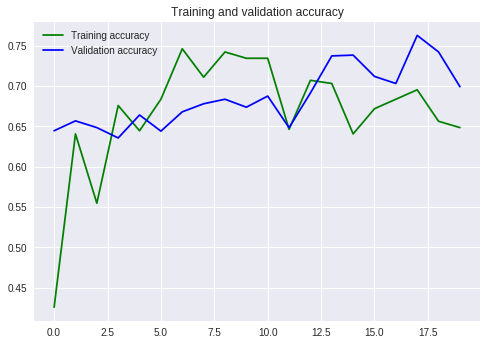

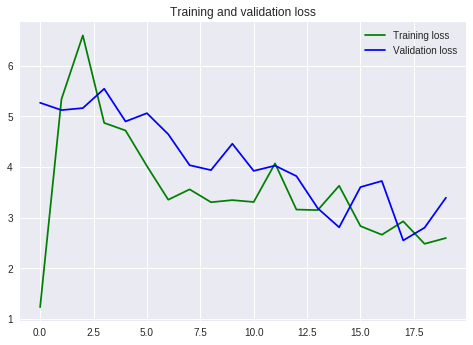

In [0]:
accuracy = guitar_model_fitted.history['acc']
val_accuracy = guitar_model_fitted.history['val_acc']
loss = guitar_model_fitted.history['loss']
val_loss = guitar_model_fitted.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color='green', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### confusion matrix and associated metrics (precision, recall, F-score) for this classifier.

In [0]:
Y_pred = guitar_model.predict_generator(validation_generator, steps=2)
#The position of the highest number in the column is got. In case we can get the maximum value in the row will need to specify 'axis=0'.
Y_pred
#y_pred = np.argmax(Y_pred, axis=0)
#y_pred
len(Y_pred)

492

In [0]:
len(validation_generator.classes)

492

### Conclusion: The confussion matrix shows that the model created classified all the pictures as guitars. Therefore, the recall is 1. Note that this model is neither good nor useful.

Confusion Matrix
[[306   0]
 [186   0]]
Classification Report
              precision    recall  f1-score   support

      Guitar       0.62      1.00      0.77       306
  Not Guitar       0.00      0.00      0.00       186

   micro avg       0.62      0.62      0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492

0.6219512195121951 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


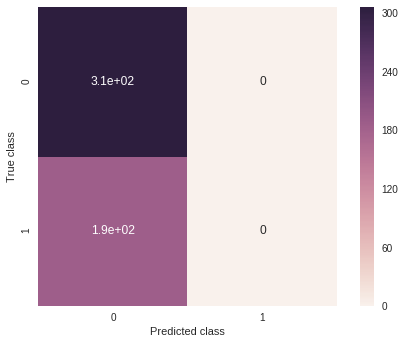

In [0]:
Y_pred = guitar_model.predict_generator(validation_generator, steps=2)
#The position of the highest number in the column is got. In case we can get the maximum value in the row will need to specify 'axis=0'.
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Guitar', 'Not Guitar']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

C = confusion_matrix(validation_generator.classes, y_pred)
ax = sns.heatmap(C, annot=True, square=True)
ax.set_ylabel('True class')
ax.set_xlabel('Predicted class')

precision = C[0,0] / (C[0,0] + C[1,0])
recall = C[0][0] / (C[0,0] + C[0,1])

print(precision, recall)

###ROC curve and AUC curve

In [0]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
len(Y_pred)

332

### Conclusion ROC curve. The results from the ROC curve are not good eiher. The graph shows that the probability to hit the result is, 0,5. This means that we will get the same result if we throw a coin into the air. Therefore the model , it is the s we will have the same result and it is not worth it to use the model

No handles with labels found to put in legend.


The area under the curve is 0.478828


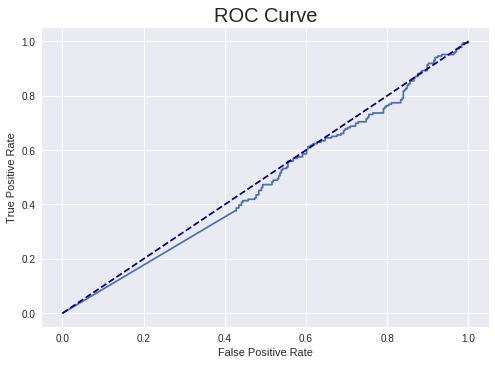

In [0]:
from sklearn.metrics import roc_curve
Y_pred = guitar_model.predict_generator(validation_generator, steps=8).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(validation_generator.classes, Y_pred)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras,tpr_keras)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size=20)
plt.legend(loc="lower right")
print('The area under the curve is %f' %(auc_keras))

In [0]:
guitar_model_fitted.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

###And finlly, a random image is taken in order to see the performance of our model

### As we can see, if the model see a different image from the ones used to train the model, the image is missclassified.

not_guitar


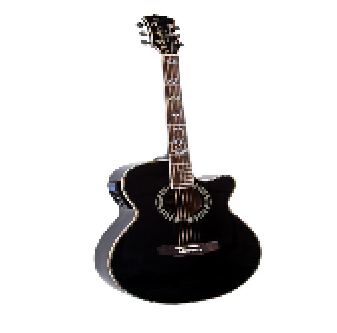

In [0]:
from keras.preprocessing import image

test_image = image.load_img('./gdrive/My Drive/guitar_project/black-fire-electro-acoustic-guitar-front-555x832.jpg', target_size = (150, 150,3))
#The image is converted to an array in order to work with it.
test_image_array = image.img_to_array(test_image)
#Another degree is added in order to get 4 degrees.
test_image_array = np.expand_dims(test_image_array, axis = 0)
#Once the array is fixed, we predict with the model created previously.
result = guitar_model.predict(test_image_array)
#train_generator.class_indices
if result[0] == 1:
  prediction = 'guitar'
else:
  prediction = 'not_guitar'
print(prediction)

#The image is plotten
image=plt.imshow(test_image)
# Hide grid lines
ax.grid(False)
# Hide axes ticks
plt.axis('off')
plt.show()




#Links for reference
https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

https://www.youtube.com/watch?v=YRhxdVk_sIs 

https://towardsdatascience.com/conv-nets-for-dummies-a-bottom-up-approach-c1b754fb14d6


# Mirate este link para mellorar a performance do teu modelo:
https://blog.slavv.com/37-reasons-why-your-neural-network-is-not-working-4020854bd607